In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = Path().absolute().parent / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [15]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: seqseq
n_repeats: 10
scenario_params_list:
 - partners_count: 
     - 10
   amounts_per_partner: 
     - [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   samples_split_option: 
     - [[1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific']]
   samples_split_option: 
     - 'stratified'
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform' 
   epoch_count: 
     - 50
   minibatch_count: 
     - 1
     - 2
     - 5
     - 10


In [16]:
experiment_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 22 columns):
aggregation_weighting              160 non-null object
amounts_per_partner                160 non-null object
dataset_name                       160 non-null object
epoch_count                        160 non-null float64
final_relative_nb_samples          160 non-null object
gradient_updates_per_pass_count    160 non-null float64
is_early_stopping                  160 non-null float64
learning_computation_time_sec      160 non-null float64
minibatch_count                    160 non-null float64
mpl_nb_epochs_done                 160 non-null float64
mpl_test_score                     160 non-null float64
multi_partner_learning_approach    160 non-null object
nb_samples_used                    160 non-null float64
partners_count                     160 non-null float64
samples_split_option               160 non-null object
scenario_name                      160 non-null object
short_

In [22]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()
df.head(5)

Random state [0 1 2 3 4 5 6 7 8 9]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
amounts_per_partner ['[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
aggregation_weighting              160 non-null object
amounts_per_partner                160 non-null object
dataset_name                       160 non-null object
epoch_count                        160 non-null float64
final_relative_nb_samples          160 non-null object
gradient_updates_per_pass_count    160 non-null float64
is_early_stopping                  160 non-null float64
learning_computation_time_sec      160 non-null float64
minibatch_count                    160 non-null float64
mpl_nb_epochs_done                 160 non-null float64
mpl_test_score                     160 non-null float64
multi_partner_learning_approach    160 non-null object
nb_samples_used                    160 non-null float64

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
0,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,104.399722,1.0,8.0,...,10.0,stratified,scenario_1_repeat_1_2020-06-05_16h41_de1,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",global,10000.0,48000.0,0,0,1.739995
1,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,185.690781,2.0,7.0,...,10.0,stratified,scenario_2_repeat_1_2020-06-05_16h43_812,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",global,10000.0,48000.0,0,1,3.094846
2,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,415.542651,5.0,5.0,...,10.0,stratified,scenario_3_repeat_1_2020-06-05_16h46_772,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",global,10000.0,48000.0,0,2,6.925711
3,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,1166.049576,10.0,5.0,...,10.0,stratified,scenario_4_repeat_1_2020-06-05_16h53_fcd,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",global,10000.0,48000.0,0,3,19.434160
4,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,48.808429,1.0,17.0,...,10.0,stratified,scenario_5_repeat_1_2020-06-05_17h13_7b0,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",global,10000.0,48000.0,0,4,0.813474


In [18]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 1.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 2.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 5.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 10.0'],
      dtype=object)

In [19]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


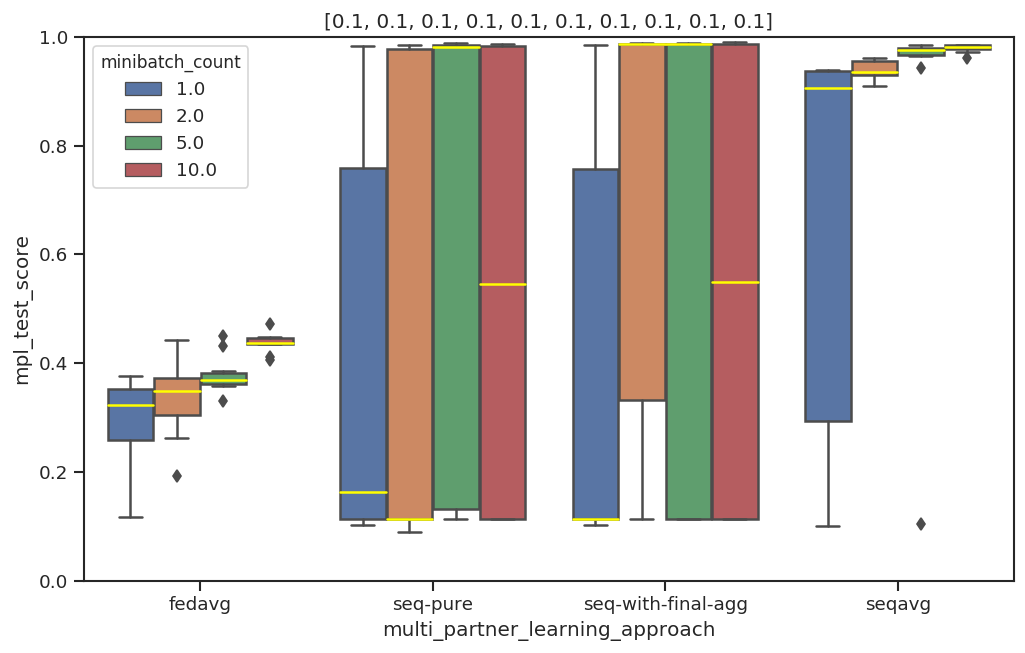

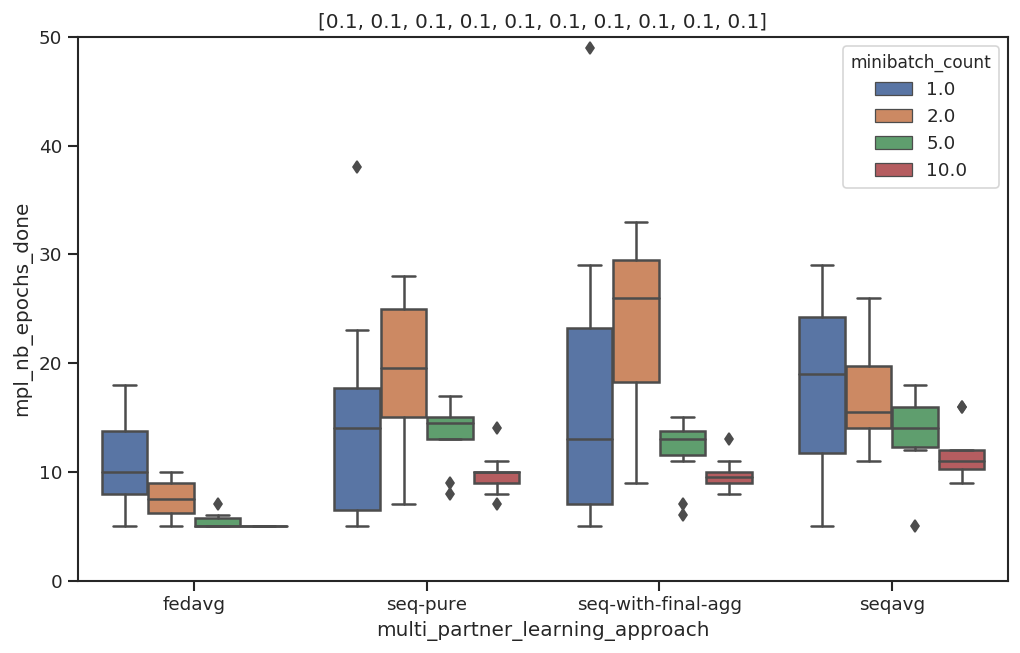

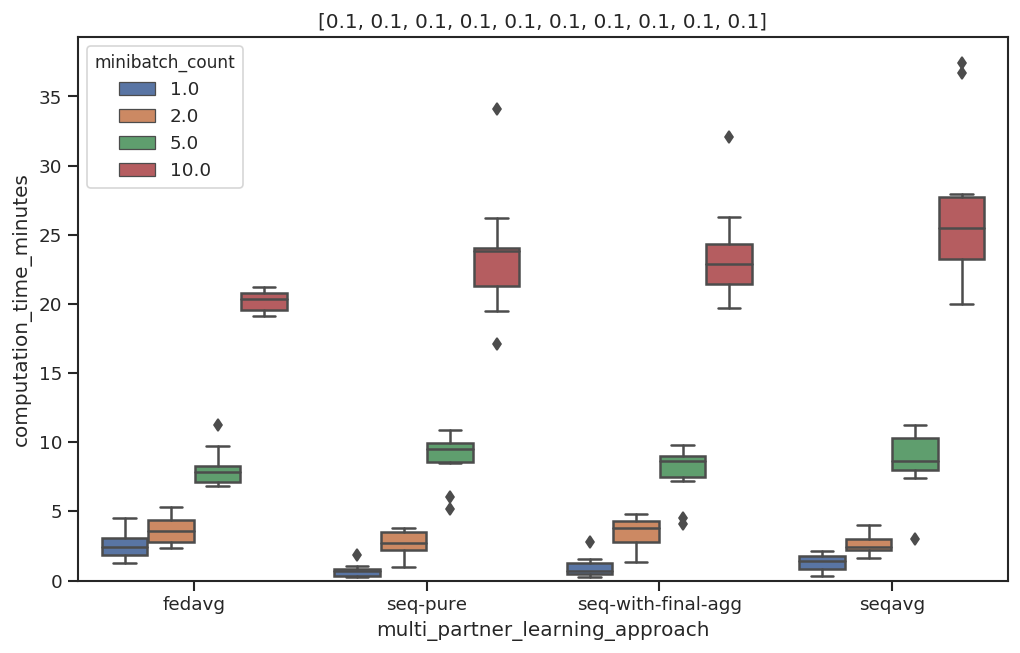

In [31]:
# Plot loop
for amounts_per_partner in amounts_per_partner_list:
    
    current_df = df[df.amounts_per_partner == amounts_per_partner]

    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(amounts_per_partner)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    ax = sns.boxplot(x="multi_partner_learning_approach", y="mpl_test_score", hue="minibatch_count",
                       data=current_df, medianprops={'color':'yellow'})
    plt.ylim([0, 1])
    
    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    ax = sns.boxplot(x="multi_partner_learning_approach", y="mpl_nb_epochs_done", hue="minibatch_count",
                       data=current_df)
    plt.ylim([0, 50])

        
    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    sns.boxplot(x="multi_partner_learning_approach", y="computation_time_minutes", hue="minibatch_count",
                     data=current_df)
    plt.ylim(bottom=0)

    
    plt.show()
    

11.5